In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
uploaded= files.upload()

Saving car_dataset_updated.csv to car_dataset_updated.csv


In [ ]:
df=pd.read_csv("car_dataset_updated.csv")
df

,Unnamed: 0,name,year,engine,transmission,fuel,ownership,distance_travelled,Price
0,0,Nissan MAGNITE,2021,XE,Manual,Petrol,1st Owner,18745,597000
1,1,Hyundai Elite i20,2015,MAGNA 1.2,Manual,Petrol,1st Owner,58583,500000
2,2,Hyundai Creta,2018,SX PLUS 1.6 PETROL,Manual,Petrol,1st Owner,81644,999000
3,3,Volkswagen Polo,2021,HIGHLINE PLUS 1.0L TSI AT,Automatic,Petrol,1st Owner,55053,944000
4,4,Hyundai Verna,2020,SX 1.5 VTVT,Manual,Petrol,1st Owner,15471,1033000
...,...,...,...,...,...,...,...,...,...
1945,1945,Maruti S PRESSO,2020,VXI PLUS AMT,Automatic,Petrol,1st Owner,18691,546000
1946,1946,Toyota Glanza,2022,V,Manual,Petrol,1st Owner,12786,940000
1947,1947,Hyundai i20 Active,2017,1.2 SX,Manual,Petrol,1st Owner,43031,714000
1948,1948,Maruti Wagon R 1.0,2010,VXI,Manual,Petrol,1st Owner,131140,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1950 non-null   int64 
 1   name                1950 non-null   object
 2   year                1950 non-null   int64 
 3   engine              1950 non-null   object
 4   transmission        1950 non-null   object
 5   fuel                1950 non-null   object
 6   ownership           1950 non-null   object
 7   distance_travelled  1950 non-null   object
 8   Price               1950 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 137.2+ KB


## **Data Visualization**

In [ ]:
names_values = df['name'].values

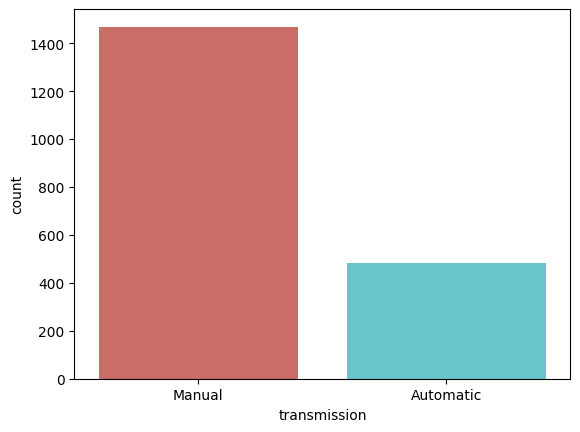

In [ ]:
sns.countplot(x="transmission", data=df, palette="hls")
plt.show()

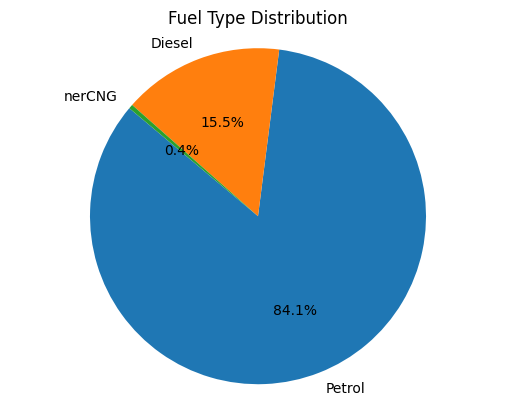

In [ ]:
# sns.countplot(x="fuel", data=df, palette="Paired")
# plt.show()


fuel_counts = df['fuel'].value_counts()

fuel_counts_nonzero = fuel_counts[fuel_counts > 1]

plt.pie(fuel_counts_nonzero, labels=fuel_counts_nonzero.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal')

plt.show()

<BarContainer object of 13 artists>

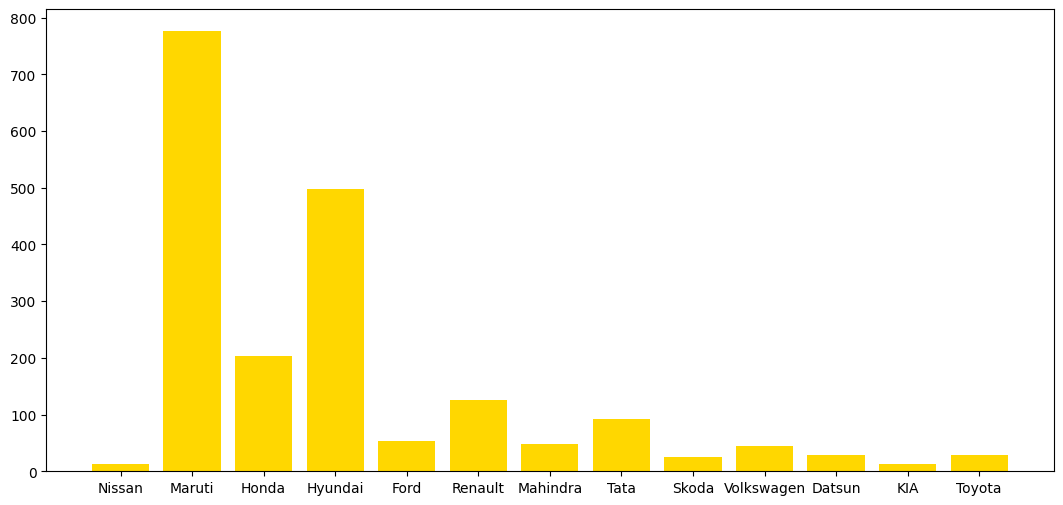

In [ ]:
brands=['Nissan','Maruti','Honda','Hyundai','Ford','Renault','Mahindra','Tata','Skoda','Volkswagen','Datsun','KIA','Toyota']
br_count=[0]*len(brands)
for i in range(len(df)):
  for j in range(len(brands)):
    if(brands[j] in df['name'][i]):
      br_count[j]=br_count[j]+1
plt.figure(figsize=(13, 6))
plt.bar(brands, br_count,  color='#FFD700')

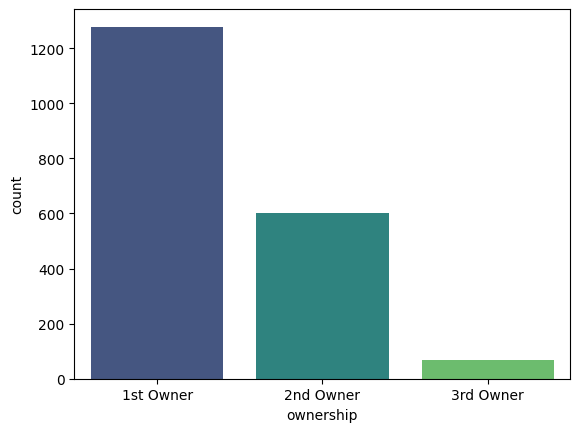

In [ ]:
sns.countplot(x="ownership", data=df, palette="viridis")
plt.show()

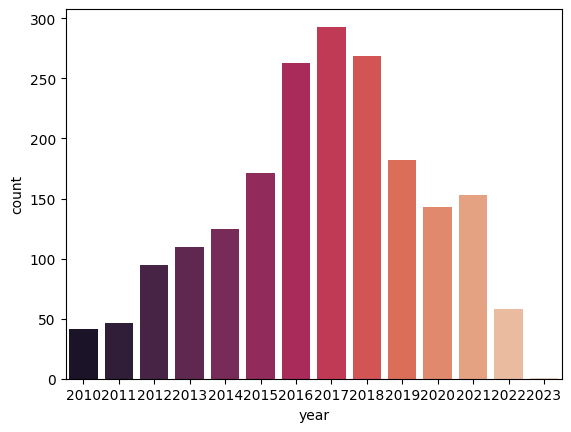

In [ ]:
sns.countplot(x="year", data=df, palette="rocket")
plt.show()

In [ ]:
def categorical_visualization(cols):
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="Price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)


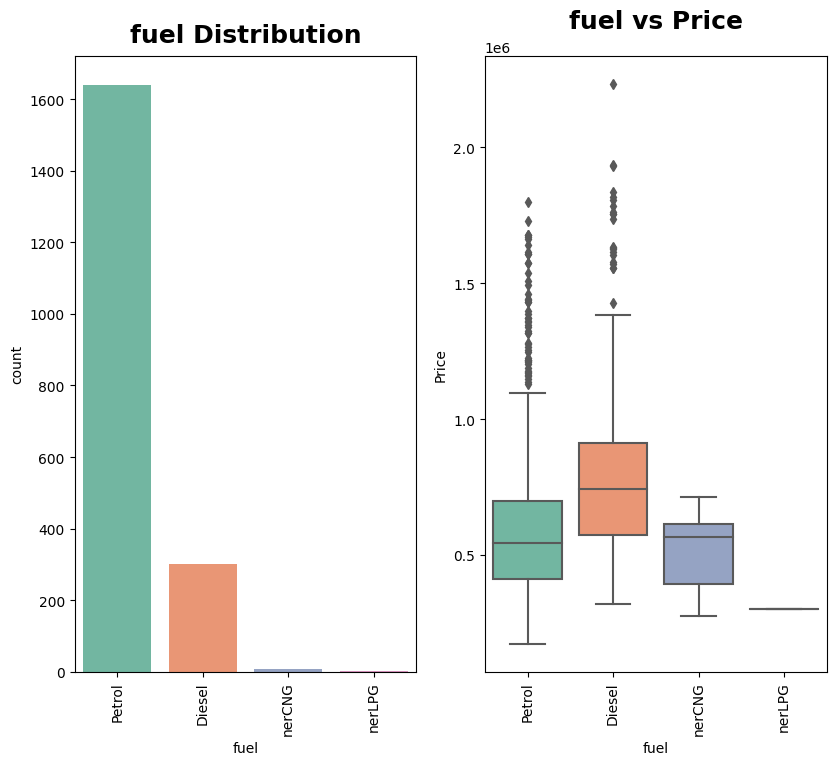

In [ ]:
categorical_visualization("fuel")

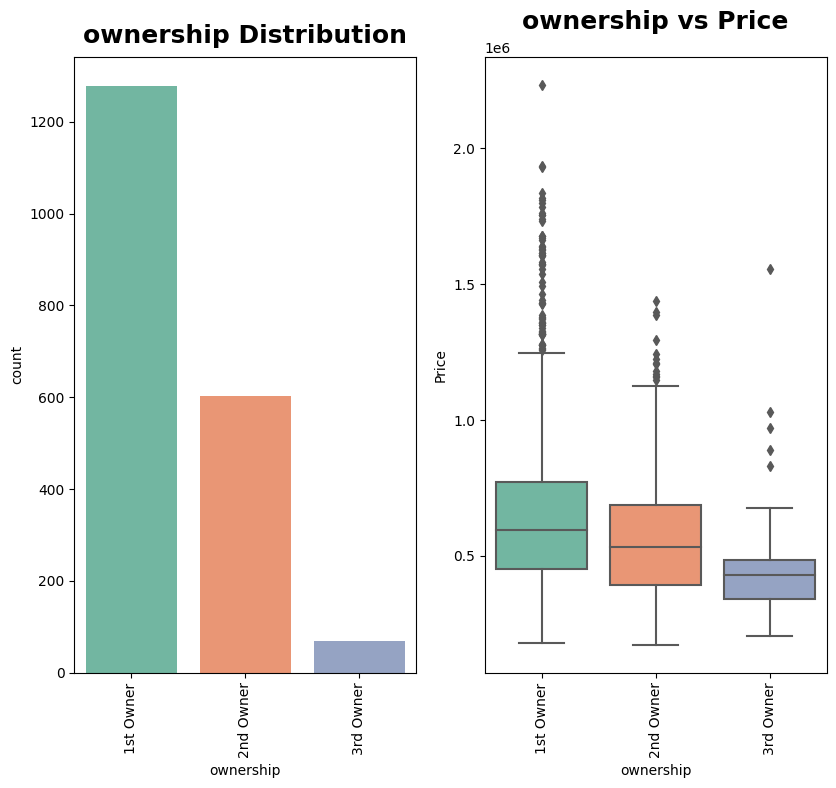

In [ ]:
categorical_visualization("ownership")

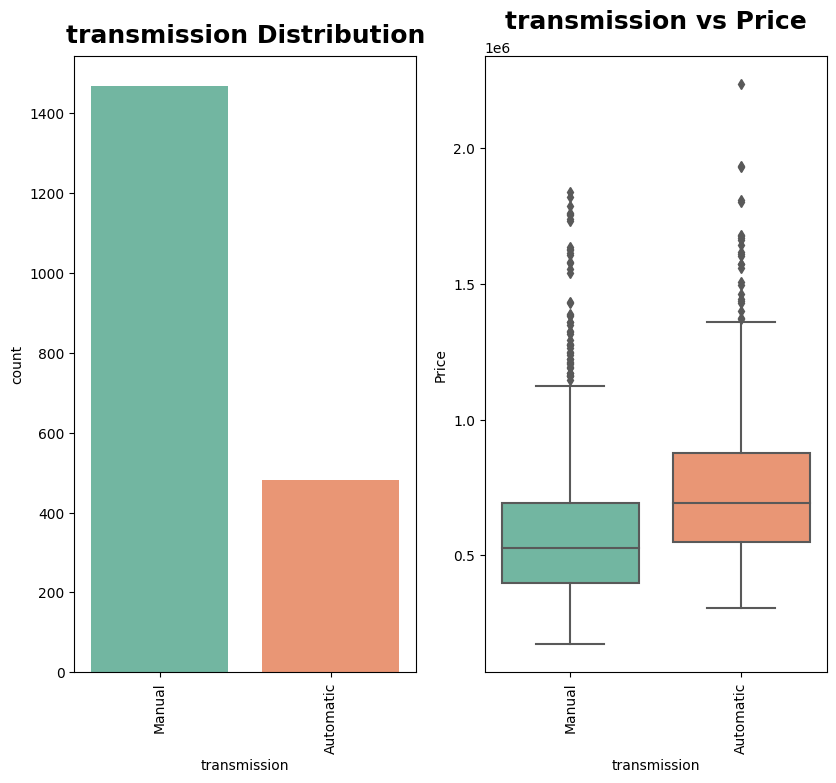

In [ ]:
categorical_visualization("transmission")

In [ ]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="Price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

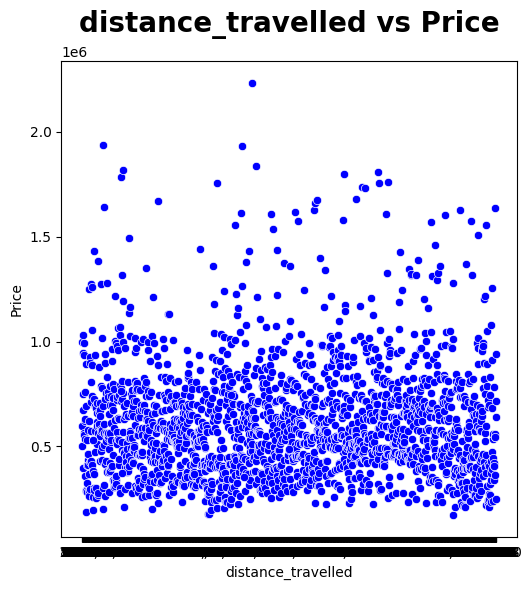

In [ ]:
scatter_plot(["distance_travelled"])

# **Data Preprocessing**

In [ ]:
df['distance_travelled'].describe()

count      1950
unique     1941
top       62750
freq          2
Name: distance_travelled, dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
engine                0
transmission          0
fuel                  0
ownership             0
distance_travelled    0
Price                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1950 non-null   int64 
 1   name                1950 non-null   object
 2   year                1950 non-null   int64 
 3   engine              1950 non-null   object
 4   transmission        1950 non-null   object
 5   fuel                1950 non-null   object
 6   ownership           1950 non-null   object
 7   distance_travelled  1950 non-null   object
 8   Price               1950 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 137.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder


le_parity = LabelEncoder()
# df['Engine_'] = le_parity.fit_transform(df['engine'])
df['Name_'] = le_parity.fit_transform(df['name'])
df['Transmission_'] = le_parity.fit_transform(df['transmission'])
df['Engine_'] = le_parity.fit_transform(df['engine'])

label_encoder=LabelEncoder()
encoded_label = label_encoder.fit_transform(df['fuel'])
df['Fuel_']=encoded_label
mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

label_encoder2=LabelEncoder()
encoded_label2 = label_encoder2.fit_transform(df['ownership'])
df['Ownership_']=encoded_label2
mapping2 = {index: label for index, label in enumerate(label_encoder2.classes_)}

In [ ]:
mapping2

{0: '1st Owner', 1: '2nd Owner', 2: '3rd Owner'}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1950 non-null   int64 
 1   name                1950 non-null   object
 2   year                1950 non-null   int64 
 3   engine              1950 non-null   object
 4   transmission        1950 non-null   object
 5   fuel                1950 non-null   object
 6   ownership           1950 non-null   object
 7   distance_travelled  1950 non-null   object
 8   Price               1950 non-null   int64 
 9   Name_               1950 non-null   int64 
 10  Transmission_       1950 non-null   int64 
 11  Engine_             1950 non-null   int64 
 12  Fuel_               1950 non-null   int64 
 13  Ownership_          1950 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 213.4+ KB


In [ ]:
# name_values=df['name'].copy()#obtaining names
# name_values=list(name_values)

In [ ]:
df=df.drop(labels=["Unnamed: 0","name","engine","transmission","fuel","ownership"],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                1950 non-null   int64 
 1   distance_travelled  1950 non-null   object
 2   Price               1950 non-null   int64 
 3   Name_               1950 non-null   int64 
 4   Transmission_       1950 non-null   int64 
 5   Engine_             1950 non-null   int64 
 6   Fuel_               1950 non-null   int64 
 7   Ownership_          1950 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 122.0+ KB


In [ ]:
df['distance_travelled'] = pd.to_numeric(df['distance_travelled'].str.replace(',', ''), errors='coerce')

In [ ]:
df3=df.copy()
df3

,year,distance_travelled,Price,Name_,Transmission_,Engine_,Fuel_,Ownership_
0,2021,18745,597000,67,1,421,1,0
1,2015,58583,500000,16,1,222,1,0
2,2018,81644,999000,15,1,341,1,0
3,2021,55053,944000,95,0,186,1,0
4,2020,15471,1033000,26,1,334,1,0
...,...,...,...,...,...,...,...,...
1945,2020,18691,546000,59,0,400,1,0
1946,2022,12786,940000,89,1,370,1,0
1947,2017,43031,714000,30,1,9,1,0
1948,2010,131140,250000,63,1,382,1,0


Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
scaled_data

array([[ 1.48528186, -1.34113138, -0.06731701, ...,  0.98358488,
         0.40221912, -0.68653238],
       [-0.61146015,  0.10205492, -0.42216802, ..., -0.42046642,
         0.40221912, -0.68653238],
       [ 0.43691086,  0.93747133,  1.40330265, ...,  0.41914215,
         0.40221912, -0.68653238],
       ...,
       [ 0.08745385, -0.46133766,  0.36069916, ..., -1.92329518,
         0.40221912, -0.68653238],
       [-2.35874515,  2.73053196, -1.33673249, ...,  0.70841904,
         0.40221912, -0.68653238],
       [ 0.78636786, -0.79625049,  0.08632982, ...,  0.10869864,
         0.40221912, -0.68653238]])

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df

,year,distance_travelled,Price,Name_,Transmission_,Engine_,Fuel_,Ownership_
0,1.485282,-1.341131,-0.067317,0.960539,0.572218,0.983585,0.402219,-0.686532
1,-0.611460,0.102055,-0.422168,-1.067347,0.572218,-0.420466,0.402219,-0.686532
2,0.436911,0.937471,1.403303,-1.107110,0.572218,0.419142,0.402219,-0.686532
3,1.485282,-0.025824,1.202098,2.073888,-1.747585,-0.674466,0.402219,-0.686532
4,1.135825,-1.459737,1.527683,-0.669722,0.572218,0.369753,0.402219,-0.686532
...,...,...,...,...,...,...,...,...
1945,1.135825,-1.343088,-0.253888,0.642439,-1.747585,0.835419,0.402219,-0.686532
1946,1.834739,-1.557004,1.187465,1.835314,0.572218,0.623753,0.402219,-0.686532
1947,0.087454,-0.461338,0.360699,-0.510673,0.572218,-1.923295,0.402219,-0.686532
1948,-2.358745,2.730532,-1.336732,0.801489,0.572218,0.708419,0.402219,-0.686532


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()
scaler_m.fit(df)
scaled_data_mm = scaler_m.transform(df)


In [ ]:
scaled_data_mm

array([[0.84615385, 0.11688505, 0.20572538, ..., 0.84031936, 0.33333333,
        0.        ],
       [0.38461538, 0.3862318 , 0.15866084, ..., 0.44311377, 0.33333333,
        0.        ],
       [0.61538462, 0.54214839, 0.40077632, ..., 0.68063872, 0.33333333,
        0.        ],
       ...,
       [0.53846154, 0.28108393, 0.26249393, ..., 0.01796407, 0.33333333,
        0.        ],
       [0.        , 0.87679337, 0.0373605 , ..., 0.76247505, 0.33333333,
        0.        ],
       [0.69230769, 0.21857802, 0.22610383, ..., 0.59281437, 0.33333333,
        0.        ]])

In [ ]:
min_scaled_df = pd.DataFrame(scaled_data_mm, columns=df.columns)
min_scaled_df

,year,distance_travelled,Price,Name_,Transmission_,Engine_,Fuel_,Ownership_
0,0.846154,0.116885,0.205725,0.683673,1.0,0.840319,0.333333,0.0
1,0.384615,0.386232,0.158661,0.163265,1.0,0.443114,0.333333,0.0
2,0.615385,0.542148,0.400776,0.153061,1.0,0.680639,0.333333,0.0
3,0.846154,0.362365,0.374090,0.969388,0.0,0.371257,0.333333,0.0
4,0.769231,0.094749,0.417273,0.265306,1.0,0.666667,0.333333,0.0
...,...,...,...,...,...,...,...,...
1945,0.769231,0.116520,0.180980,0.602041,0.0,0.798403,0.333333,0.0
1946,0.923077,0.076596,0.372149,0.908163,1.0,0.738523,0.333333,0.0
1947,0.538462,0.281084,0.262494,0.306122,1.0,0.017964,0.333333,0.0
1948,0.000000,0.876793,0.037361,0.642857,1.0,0.762475,0.333333,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Price'], axis=1),
    df['Price'],
    test_size=0.3,
    random_state=0)

Removing Outlier

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([1.21035021, 0.76822761, 0.57033568, 2.80247315, 0.71833655,
       3.81529586, 0.18751626])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Fuel_                 3.815296
Transmission_         2.802473
year                  1.210350
distance_travelled    0.768228
Engine_               0.718337
Name_                 0.570336
Ownership_            0.187516
dtype: float64

<Axes: >

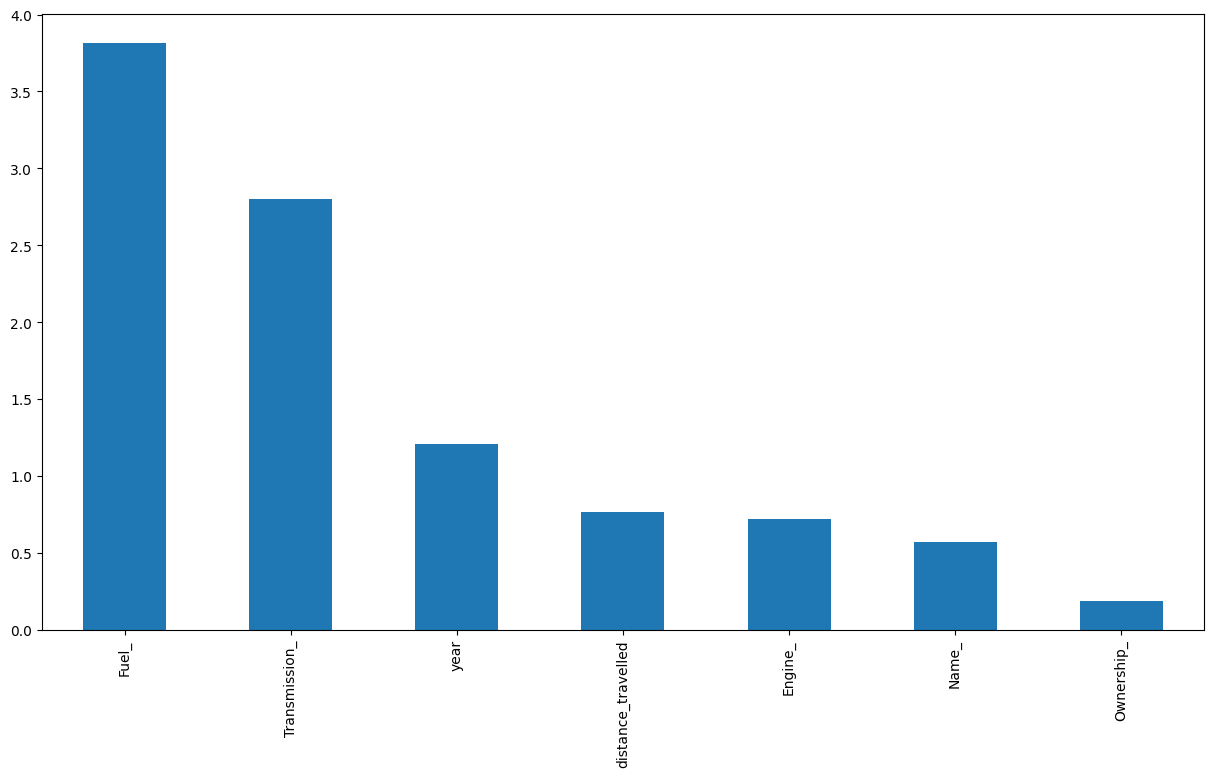

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
a=clf.feature_importances_
a = pd.Series(a)
a.index = X_train.columns
a.sort_values(ascending=False)

distance_travelled    0.381176
Engine_               0.198686
Name_                 0.188014
year                  0.089614
Transmission_         0.061484
Ownership_            0.058952
Fuel_                 0.022074
dtype: float64

<Axes: >

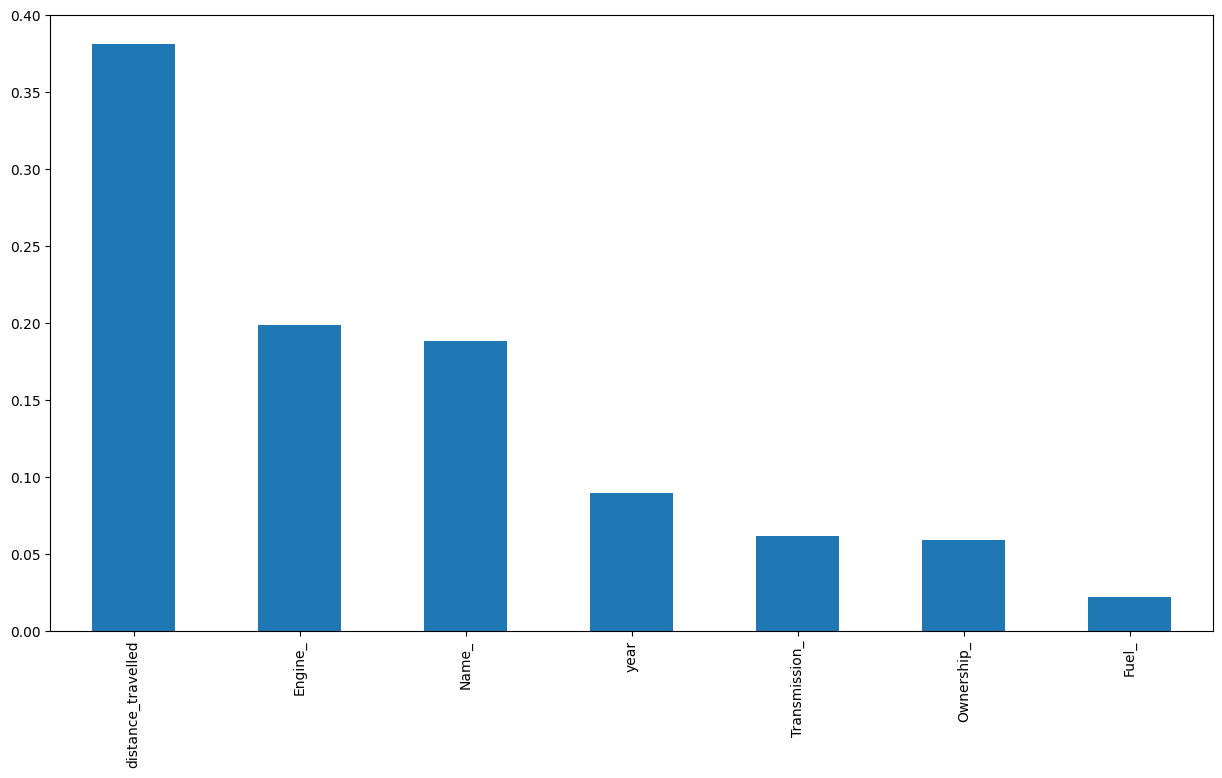

In [ ]:
a.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf=model.feature_importances_
rf = pd.Series(rf)
rf.index = X_train.columns
rf.sort_values(ascending=False)

distance_travelled    0.363799
Engine_               0.204987
Name_                 0.189918
year                  0.145146
Ownership_            0.054111
Transmission_         0.021933
Fuel_                 0.020106
dtype: float64

<Axes: >

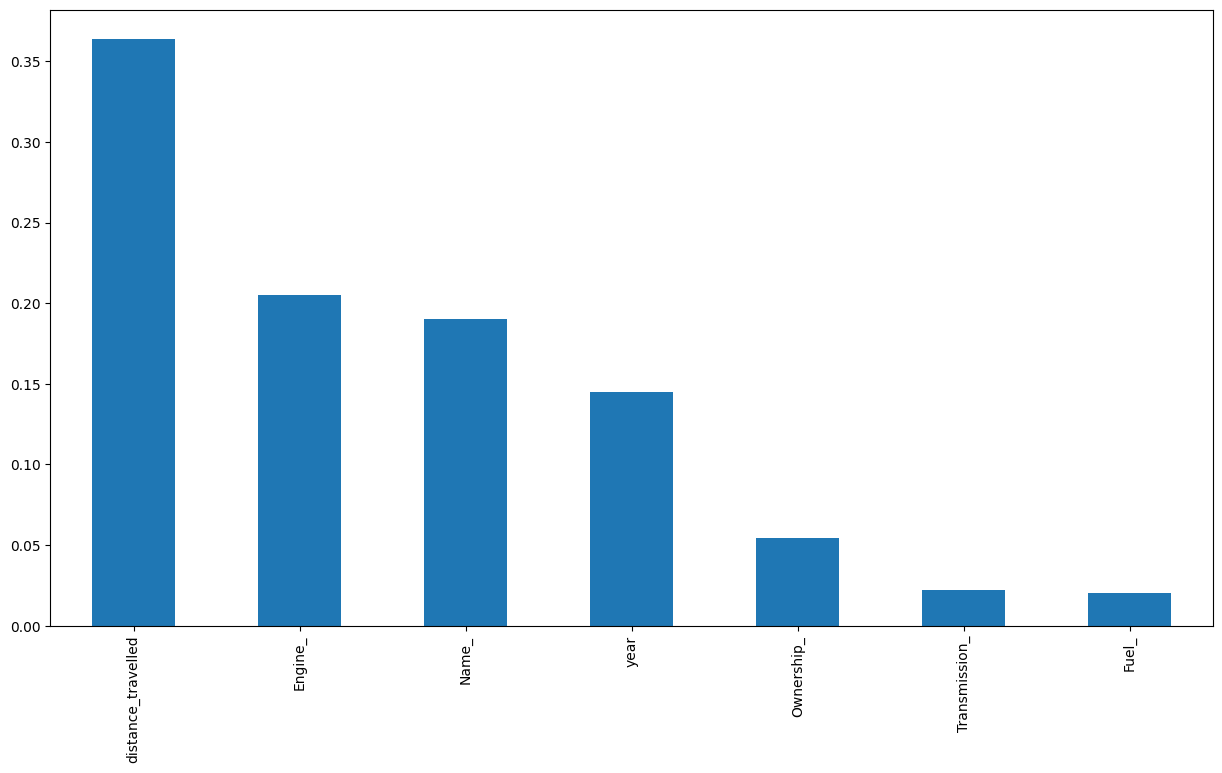

In [ ]:
rf.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_reg = mutual_info_regression(X_train,y_train)
mutual_reg

array([0.32748274, 0.02466605, 0.10122967, 0.06871618, 0.10732061,
       0.03910267, 0.01943929])

In [ ]:
mutual_reg = pd.Series(mutual_reg)
mutual_reg.index = X_train.columns
mutual_reg.sort_values(ascending=False)

year                  0.327483
Engine_               0.107321
Name_                 0.101230
Transmission_         0.068716
Fuel_                 0.039103
distance_travelled    0.024666
Ownership_            0.019439
dtype: float64

<Axes: >

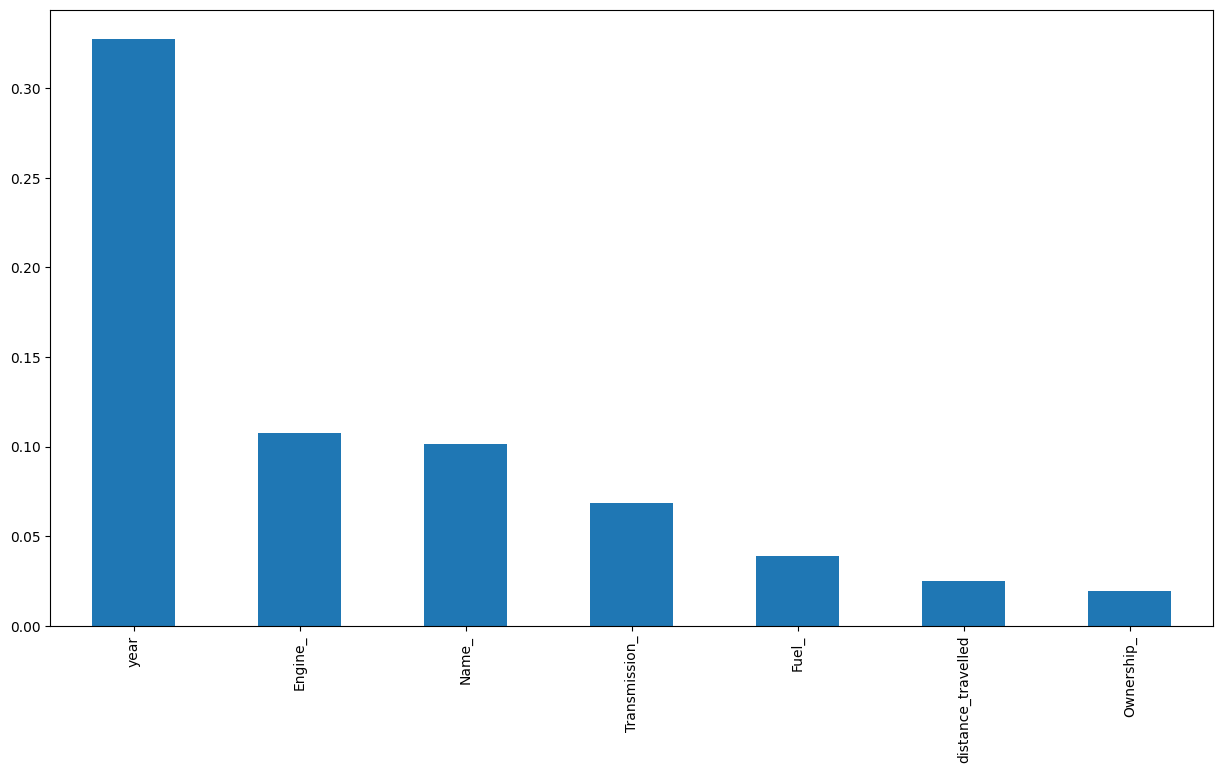

In [ ]:
mutual_reg.sort_values(ascending=False).plot.bar(figsize=(15, 8))

# **Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Price'], axis=1),
    df['Price'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.head()

,year,distance_travelled,Name_,Transmission_,Engine_,Fuel_,Ownership_
910,2018,31738,27,1,328,1,0
1348,2016,81853,15,1,341,1,1
1645,2012,64655,8,1,280,1,0
411,2018,55943,16,1,294,1,0
547,2020,44790,45,1,208,1,0


# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from sklearn import tree
model_dt = tree.DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
acc_dt=model_dt.score(X_test, y_test)

y_pred = model_dt.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy",acc_dt*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 71.39218809571281
Mean Squared Error (MSE): 10001895006.944445
Mean Absolute Error (MAE): 60793.47222222222
R-squared (R2) Score: 0.7139218809571282


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
acc_rf= model.score(X_test, y_test)

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_rf*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 85.43950810801503
Mean Squared Error (MSE): 5090655365.056945
Mean Absolute Error (MAE): 48050.48333333333
R-squared (R2) Score: 0.8543950810801504


In [ ]:

from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
acc_lr=model_lr.score(X_test, y_test)

y_pred = model_lr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_lr*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 44.15562595633001
Mean Squared Error (MSE): 19524372146.39321
Mean Absolute Error (MAE): 108360.82147100862
R-squared (R2) Score: 0.44155625956330014


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
acc_gb=model_gb.score(X_test, y_test)

y_pred = model_gb.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_gb*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 84.5447391005507
Mean Squared Error (MSE): 5403485500.338455
Mean Absolute Error (MAE): 53132.44804186111
R-squared (R2) Score: 0.845447391005507


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)
acc_ad= ad.score(X_test, y_test)

y_pred = ad.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_ad*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 56.41405625218869
Mean Squared Error (MSE): 15238566116.231522
Mean Absolute Error (MAE): 100920.36434734202
R-squared (R2) Score: 0.5641405625218869


In [ ]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

acc_xg=xgr.score(X_test, y_test)
y_pred = xgr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_xg*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 87.86050596371742
Mean Squared Error (MSE): 4244223402.8437133
Mean Absolute Error (MAE): 42592.45685763889
R-squared (R2) Score: 0.8786050596371742


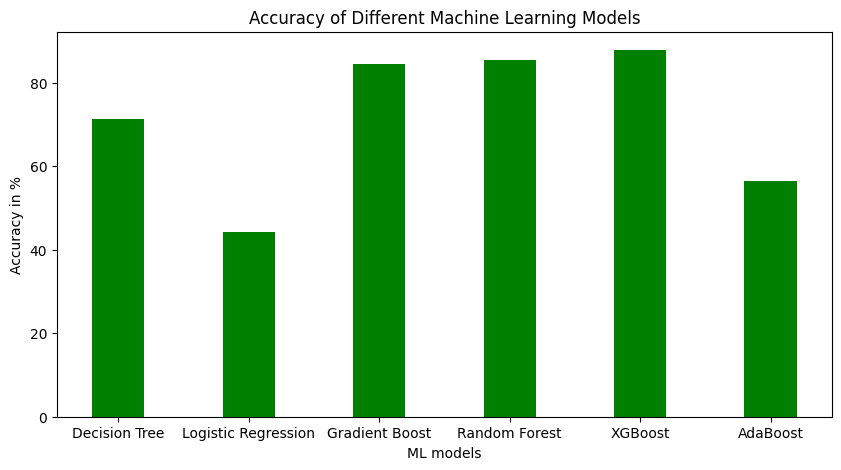

In [ ]:
acc_list=[acc_dt,acc_lr,acc_gb,acc_rf,acc_xg,acc_ad]
acc_name=['Decision Tree','Logistic Regression','Gradient Boost','Random Forest','XGBoost','AdaBoost']
for i in range( len(acc_list)):
  acc_list[i]= acc_list[i]*100
fig = plt.figure(figsize = (10, 5))



plt.bar(acc_name,acc_list,color='green',width=0.4)
plt.xlabel("ML models")
plt.ylabel("Accuracy in %")
plt.title("Accuracy of Different Machine Learning Models")
plt.show()



In [ ]:
# Preparing pickle model for Flask website
df3 = df3.drop('Engine_', axis=1)
print(df3['Price'].shape)

(1950,)


In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(df3.drop(labels=['Price'], axis=1),
    df3['Price'],
    test_size=0.3,
    random_state=0)

In [ ]:
from xgboost import XGBRegressor
xgr1 = XGBRegressor()
xgr1.fit(X_train1, y_train1)

acc_xg=xgr1.score(X_test1, y_test1)
y_pred = xgr1.predict(X_test1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test1, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_xg*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 83.60240742795331
Mean Squared Error (MSE): 13012764513.156796
Mean Absolute Error (MAE): 65610.93555021368
R-squared (R2) Score: 0.8360240742795331


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb1 = GradientBoostingRegressor()
model_gb1.fit(X_train1, y_train1)
acc_gb=model_gb1.score(X_test1, y_test1)

y_pred = model_gb1.predict(X_test1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test1, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_gb*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 76.60611784641816
Mean Squared Error (MSE): 18564864212.57052
Mean Absolute Error (MAE): 92180.62813894438
R-squared (R2) Score: 0.7660611784641815


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train1, y_train1)
acc_rf= model1.score(X_test1, y_test1)

y_pred = model1.predict(X_test1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test1, y_pred)

# Print the evaluation metrics
print("Accuracy", acc_rf*100)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Accuracy 77.96532079329447
Mean Squared Error (MSE): 17486231004.94701
Mean Absolute Error (MAE): 76606.46324786324
R-squared (R2) Score: 0.7796532079329447


In [ ]:
import pickle
#saving ml model
with open('mlmodel3.pkl', 'wb') as f:
   pickle.dump(model1, f)

In [ ]:
df3

,year,distance_travelled,Price,Name_,Transmission_,Fuel_,Ownership_
0,2021,18745,597000,67,1,1,0
1,2015,58583,500000,16,1,1,0
2,2018,81644,999000,15,1,1,0
3,2021,55053,944000,95,0,1,0
4,2020,15471,1033000,26,1,1,0
...,...,...,...,...,...,...,...
1945,2020,18691,546000,59,0,1,0
1946,2022,12786,940000,89,1,1,0
1947,2017,43031,714000,30,1,1,0
1948,2010,131140,250000,63,1,1,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                1950 non-null   int64
 1   distance_travelled  1950 non-null   int64
 2   Price               1950 non-null   int64
 3   Name_               1950 non-null   int64
 4   Transmission_       1950 non-null   int64
 5   Fuel_               1950 non-null   int64
 6   Ownership_          1950 non-null   int64
dtypes: int64(7)
memory usage: 106.8 KB


In [ ]:
X_test1

,year,distance_travelled,Name_,Transmission_,Fuel_,Ownership_
18,2018,67230,12,1,1,0
1515,2017,40073,11,1,1,1
1609,2016,40623,49,1,1,0
187,2021,23316,67,1,1,0
333,2015,116516,19,1,0,0
...,...,...,...,...,...,...
520,2017,58647,46,1,1,0
991,2017,46947,30,1,1,0
1702,2021,11415,59,1,1,0
1460,2016,68576,11,1,1,0
